<a href="https://colab.research.google.com/github/Raaghashree/PRODIGY_CS_02/blob/main/PIT_ImageEncryption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pixel-based Image Encryption & Decryption

Please upload an image


Saving download.jpeg to download (3).jpeg

Uploaded: download (3).jpeg

Encrypted Image:


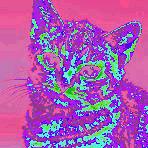


Decrypted Image:


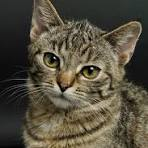

In [7]:
from PIL import Image
import numpy as np
from google.colab import files
import io
import tempfile

def encrypt_pixels(img, secret_key):
    #Encrypts image pixels using XOR operation
    img_array = np.array(img)
    secret_key = np.resize(secret_key, img_array.shape)
    encrypted_array = np.bitwise_xor(img_array, secret_key)
    return Image.fromarray(encrypted_array)

def decrypt_pixels(encrypted_img, secret_key):
    #Decrypts image pixels by applying XOR
    encrypted_array = np.array(encrypted_img)
    secret_key = np.resize(secret_key, encrypted_array.shape)
    decrypted_array = np.bitwise_xor(encrypted_array, secret_key)
    return Image.fromarray(decrypted_array)

def main():
    print("Pixel-based Image Encryption & Decryption")

    #Upload image
    print("\nPlease upload an image")
    uploaded_file = files.upload()

    if uploaded_file:
        img_name = list(uploaded_file.keys())[0]
        img = Image.open(img_name)
        print(f"\nUploaded: {img_name}")

        # Generate a random key
        secret_key = np.random.randint(0, 256, size=(3,), dtype=np.uint8)

        # Encrypt the image
        encrypted_img = encrypt_pixels(img, secret_key)

        encrypted_path = tempfile.NamedTemporaryFile(suffix=".png").name
        encrypted_img.save(encrypted_path)

        print("\nEncrypted Image:")
        display(encrypted_img)

        # Decrypt the image
        decrypted_img = decrypt_pixels(encrypted_img, secret_key)

        decrypted_path = tempfile.NamedTemporaryFile(suffix=".png").name
        decrypted_img.save(decrypted_path)

        print("\nDecrypted Image:")
        display(decrypted_img)

if __name__ == "__main__":
    main()
